In [2]:
import cv2
import numpy as np
from skimage import io      # Only needed for web grabbing images; use cv2.imread(...) for local images


# Read images
frame = cv2.cvtColor(io.imread('crop.png'), cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(io.imread('flower.jfif'), cv2.COLOR_RGB2BGR)


# Color threshold red frame; single color here, more sophisticated solution would be using cv2.inRange
mask = 255 * np.uint8(np.all(frame == [36, 28, 237], axis=2))


# Find inner contour of frame; get coordinates
contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnt = min(contours, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(cnt)


# Copy appropriately resized image to frame
frame[y:y+h, x:x+w] = cv2.resize(image, (w, h))


cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#Contouring shape
import matplotlib.pyplot as plt
def show_image_contour(image,contours):
    plt.figure()
    for n,contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
    plt.imshow(image,interpolation='nearest',cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

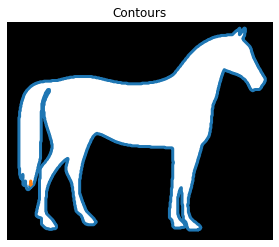

In [4]:
from skimage import measure,data
horse_image=data.horse()
contours=measure.find_contours(horse_image,level=0.8)
show_image_contour(horse_image,contours)

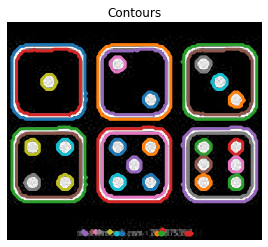

In [8]:
#Find the contours of an image that is not binary
from skimage.io import imread
from skimage import color
from skimage.filters import threshold_otsu
image_dices=imread('diceimg.png')
image_dices=color.rgb2gray(image_dices)
thresh=threshold_otsu(image_dices)
binary=image_dices>thresh
contours=measure.find_contours(binary,level=0.8)
show_image_contour(image_dices,contours)


Dice's dots number: 44.


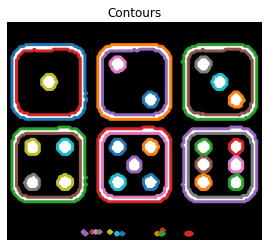

In [9]:
#Count the dots in a dice's image
import numpy as np
shape_contours=[cnt.shape[0] for cnt in contours]
max_dots_shape=200
dots_contours=[cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]
show_image_contour(binary,contours)
print("Dice's dots number: {}.".format(len(dots_contours)))
